# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be analysing data related to medical appointments in Brazil. This data set is a sample of data from medical appointments in Brazil and its main goal is to show whether the patients showed up for their appointment or not. This data contains also information about the patient like age, neighbourhood of hospital, patient's enrolment in in Brazilian welfare program and other variables. Our main goal is to try to find factors that will help us predicting whether the patients will show up to their appointment.

### Question(s) for Analysis

1- Is there a relationship between receiving SMS and not showing up to the appointment?


2- Does the days difference between the scheduled day and appointment play a role in not showing up to the appointment? is it same between Male and Female?

In [76]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [77]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [78]:
df.shape

(110527, 14)

we have 14 columns and 110527 rows

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


some data types need to be changed; ScheduledDay and AppointmentDay need to be datetime. We need also to change the names of ScheduledDay and AppointmentDay so that they have _, replace - with_ in No show. also change all upper cases to lower ones

In [80]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

to confirm again no missing data

In [81]:
df.duplicated().sum()

0

no duplicate rows

In [82]:
df.AppointmentID.duplicated().sum()

0

no repeated appointment in the data set. Every appointment ID is unique.

In [83]:
df.PatientId.duplicated().sum()

48228

Same patients have booked more than one appointment. 

In [84]:
df.PatientId.nunique()

62299

62299 are unique patients in this data set.

In [85]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In the age variable, min vlaue is -1 whih is wrong need to find this row and similar ones to drop.


### Data Cleaning 

In [86]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# changing ScheduledDay and AppointmentDay to datetime data types

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['gap'] = (df.AppointmentDay - df.ScheduledDay)
df["gap"] = (df["gap"]).dt.days

above, we transferred ScheduledDay and AppointmentDay to datetime data types, then transfered them to date only to remove time, and then made gap variable which is differnece between AppointmentDay and ScheduledDay and transferred it to a date data type

In [87]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gap
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


when viewing gap variable, we see that some days are in negative which means that the time when appointment was scheduled was before appointment day itself which is wrong so this rows need to be dropped.

In [88]:
df[df['gap'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,gap
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [89]:
df.drop(index=27033, inplace=True)
df.drop(index=55226, inplace=True)
df.drop(index=64175, inplace=True)
df.drop(index=71533, inplace=True)
df.drop(index=72362, inplace=True)

In [90]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gap
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,10.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15.255115
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


now it is correct

In [91]:
#adding _ to variable names ScheduledDay and AppointmentDay, and replace - with _ in no-show
df.rename(columns={'ScheduledDay': 'Scheduled_Day'}, inplace=True)
df.rename(columns={'AppointmentDay': 'Appointment_Day'}, inplace=True)
df.rename(columns={'No-show': 'No_show'}, inplace=True)

In [92]:
# replace all upper cases wih lower ones
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [93]:
# confirming all changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patientid        110522 non-null  float64
 1   appointmentid    110522 non-null  int64  
 2   gender           110522 non-null  object 
 3   scheduled_day    110522 non-null  object 
 4   appointment_day  110522 non-null  object 
 5   age              110522 non-null  int64  
 6   neighbourhood    110522 non-null  object 
 7   scholarship      110522 non-null  int64  
 8   hipertension     110522 non-null  int64  
 9   diabetes         110522 non-null  int64  
 10  alcoholism       110522 non-null  int64  
 11  handcap          110522 non-null  int64  
 12  sms_received     110522 non-null  int64  
 13  no_show          110522 non-null  object 
 14  gap              110522 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.5+ MB


In [94]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,gap
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,10.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15.255115
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [95]:
# remove -1 value from age
df.query('age == -1')

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,gap
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


In [96]:
df.drop(index=99832, inplace=True)

In [97]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,gap
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


now looks all correct

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patientid        110521 non-null  float64
 1   appointmentid    110521 non-null  int64  
 2   gender           110521 non-null  object 
 3   scheduled_day    110521 non-null  object 
 4   appointment_day  110521 non-null  object 
 5   age              110521 non-null  int64  
 6   neighbourhood    110521 non-null  object 
 7   scholarship      110521 non-null  int64  
 8   hipertension     110521 non-null  int64  
 9   diabetes         110521 non-null  int64  
 10  alcoholism       110521 non-null  int64  
 11  handcap          110521 non-null  int64  
 12  sms_received     110521 non-null  int64  
 13  no_show          110521 non-null  object 
 14  gap              110521 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.5+ MB


all data types changes done successfully

<a id='eda'></a>
## Exploratory Data Analysis


### General data overview

In [99]:
# in general how many parients did show up and how many did not
df['no_show'].value_counts()

No     88207
Yes    22314
Name: no_show, dtype: int64

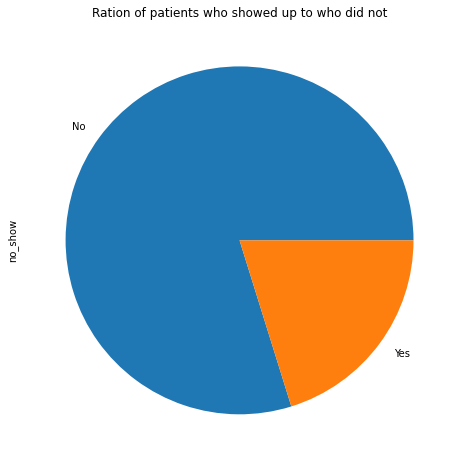

In [114]:
df['no_show'].value_counts().plot(kind='pie', figsize= (8,8))
plt.title('Ration of patients who showed up to who did not');

We can see from this pir chart and numbers that we have a serious problem that most patients (nearly 80%) do not show up to the appointment so in this two research questions, we will try to find the main factors that contributed to that.

In [115]:
df.groupby('no_show').mean()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,gap
no_show,,,,,,,,,,
No,1.476809e+14,5.681135e+06,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,8.754759
Yes,1.467385e+14,5.652252e+06,34.317872,0.115533,0.169042,0.064085,0.030340,0.020212,0.438469,15.835484


What is interesting in this data set, is that first people who are younger tend to more do not show up to appointments as mean age is 34 and 37 for people who show up. Second, people who received SMS did not show up to appointment more than people who received.

### Research Question 1  (Is their a correlation between receiving SMS and not sowing up to the appointment?)

In [116]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
smscounts = df.groupby(['no_show'], as_index=False)['sms_received'].count()
smscounts

,no_show,sms_received
0,No,88207
1,Yes,22314


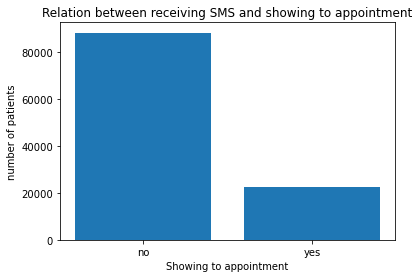

In [117]:
plt.bar([1, 2], [88207, 22319], tick_label=['no', 'yes'])
plt.title('Relation between receiving SMS and showing to appointment')
plt.xlabel('Showing to appointment')
plt.ylabel('number of patients');

As we see from the graph and statistics above, surprisingly people who received SMS did not show up to their appointment much more than those who received SMS which should not be the case. Therefore, SMS system will need to be checked as SMS is not helping patients in reminding them to attend their appointment.

### Research Question 2 Does the days difference between the scheduled day and appointment play a role in not showing up to the appointment? is it same between Male and Female? 

Text(0.5, 1.0, 'How far was appointment day from scheduled date for patients?')

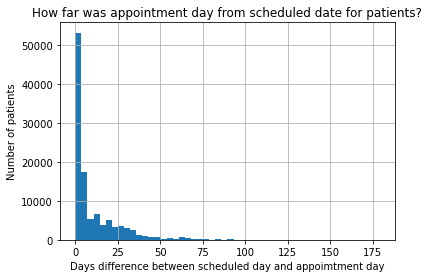

In [118]:
df.gap.hist(bins=50)
plt.xlabel('Days difference between scheduled day and appoimtment day')
plt.ylabel('Number of patients')
plt.title('How far was appointment day from scheduled date for patients?')

from the data we see that date where appointment was scheduled was the same date of appointment itself.

In [119]:
days_diff= df.groupby(['no_show'], as_index=False)['gap'].mean()
days_diff

,no_show,gap
0,No,8.754759
1,Yes,15.835484


as above, looks like the more days patient will wait for the appointment, the more likely it will be that the patient will not show up

In [120]:
df.groupby(['no_show'], as_index=False)['gap'].median()

,no_show,gap
0,No,2.0
1,Yes,11.0


with median also same result.

In [121]:
df.groupby(['no_show', 'gender'], as_index=False)['gap'].mean()

,no_show,gender,gap
0,No,F,9.093318
1,No,M,8.128803
2,Yes,F,16.030635
3,Yes,M,15.466788


We see from mean, there is no big difference between Male and Female.

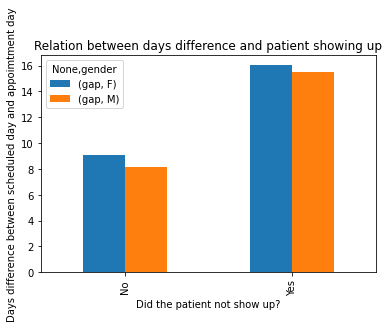

In [122]:
def daydiff(df):
    df.groupby(['no_show','gender']).mean().unstack().reset_index()\
    .plot.bar(x = 'no_show', y = ['gap'])
    plt.xlabel('Did the patient not show up?')
    plt.ylabel('Days difference between scheduled day and appoimtment day')
    plt.title('Relation between days difference and patient showing up');
daydiff(df)

the graph also visually shows the same output which that the longer the period between the day the appointment as scheduled and the appointment date, the higher the likely that the patient may not show up. The same result is for Male and Female.

<a id='conclusions'></a>
## Conclusions

The goal of this data study was to try to understand that most factors that led to patients not showing uo to their appointment. There are a lot of factors that can contribute to this, we have choosen the most two important factors that w thing that changing them may significantly contribute to decreasing the amount of patients not showing up.

1. Is there a correlation between receiving SMS and not sowing up to the appointment? is it same between Male and Female? 

Generally, SMS should remind patients of their appointment and therefore should be a contribution to increasing show up rate but surprisingly people who received SMS did not show up to their appointment much more than those who received SMS which should not be the case. Therefore, SMS system will need to be checked as SMS is not helping patients in reminding them to attend their appointment.  
 
2- Does the days difference between the scheduled day and appointment play a role in not showing up to the appointment? is it same between Male and Female?

Our analysis have shown that  the more days patient will wait for the appointment, the more likely it will be that the patient will not show up so we should try to decrease the amount of days between the scheduled and appointment date as much as possible. The same result is for Male and Female. 

About limitations, it was a good that the data did not have missing values or duplicates bit the data had some quality problems like with age where one had one was -1 and with some rows where scheduled appointment was after the actual appointment.

About data collected, we think some variables would have been important in determining the no show up rate, like income level of patient, distance between medical centre and residence of patient, and whether patient owns a car.


## Submitting your Project 

In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

reference: for bar graph
https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot